$S_0 = 50$;  $K = 50$;  $r = 5%$;  $\sigma = 30%$;  $T=1$

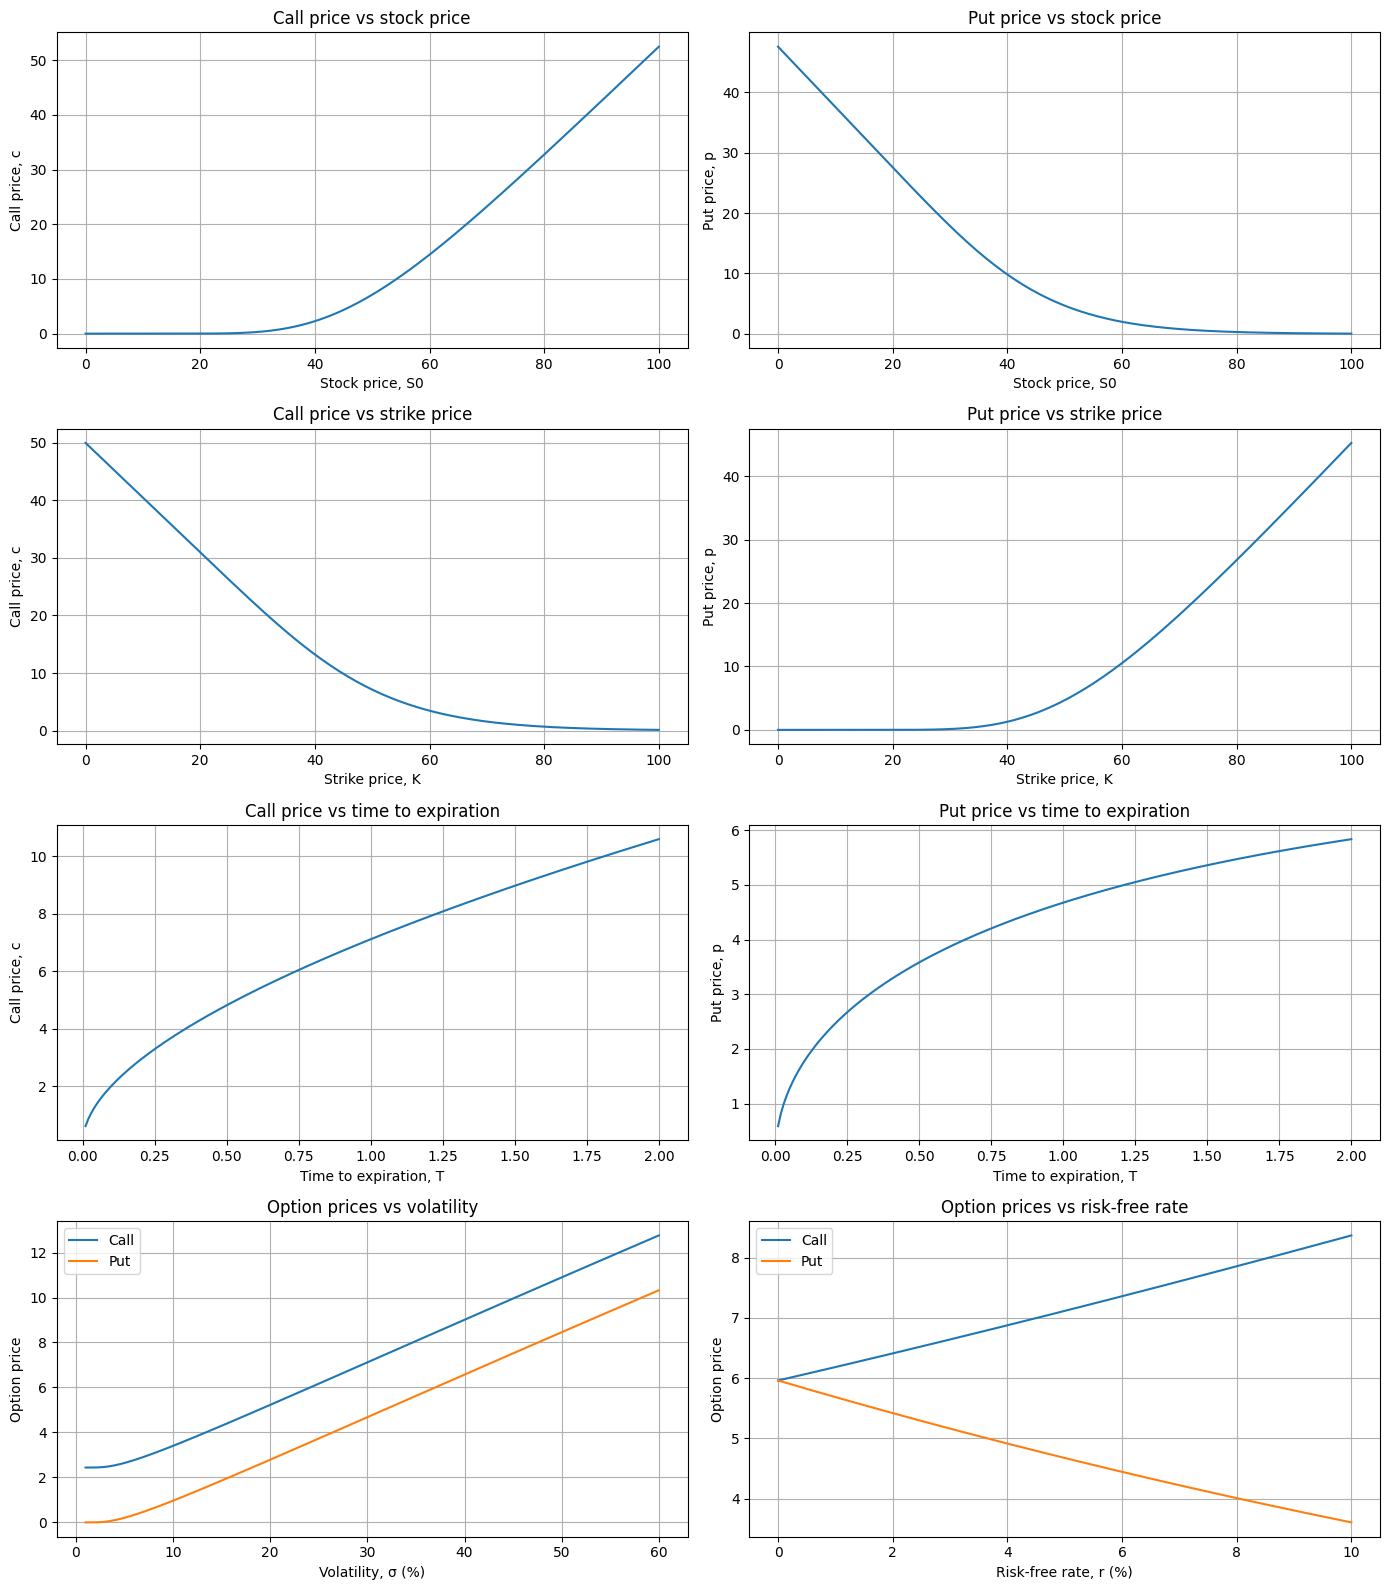

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Parameters
S0 = 50
K = 50
r = 0.05
sigma = 0.3
T = 1

# Stock price and strike price ranges
S = np.linspace(0.01, 100, 200)
K_range = np.linspace(0.01, 100, 200)

# Varying Time to expiration
T_range = np.linspace(0.01, 2, 200)
call_prices_T = black_scholes_call(S0, K, T_range, r, sigma)
put_prices_T = black_scholes_put(S0, K, T_range, r, sigma)

# Varying Volatility
sigma_range = np.linspace(0.01, 0.6, 200)
call_prices_sigma = black_scholes_call(S0, K, T, r, sigma_range)
put_prices_sigma = black_scholes_put(S0, K, T, r, sigma_range)

# Varying Risk-free rate
r_range = np.linspace(0, 0.1, 200)
call_prices_r = black_scholes_call(S0, K, T, r_range, sigma)
put_prices_r = black_scholes_put(S0, K, T, r_range, sigma)

# Existing subplots
call_prices_S = black_scholes_call(S, K, T, r, sigma)
put_prices_S = black_scholes_put(S, K, T, r, sigma)
call_prices_K = black_scholes_call(S0, K_range, T, r, sigma)
put_prices_K = black_scholes_put(S0, K_range, T, r, sigma)

fig, axs = plt.subplots(4, 2, figsize=(14, 16))

# Row 1: vs Stock price
axs[0, 0].plot(S, call_prices_S)
axs[0, 0].set_title('Call price vs stock price')
axs[0, 0].set_xlabel('Stock price, S0')
axs[0, 0].set_ylabel('Call price, c')
axs[0, 0].grid()

axs[0, 1].plot(S, put_prices_S)
axs[0, 1].set_title('Put price vs stock price')
axs[0, 1].set_xlabel('Stock price, S0')
axs[0, 1].set_ylabel('Put price, p')
axs[0, 1].grid()

# Row 2: vs Strike price
axs[1, 0].plot(K_range, call_prices_K)
axs[1, 0].set_title('Call price vs strike price')
axs[1, 0].set_xlabel('Strike price, K')
axs[1, 0].set_ylabel('Call price, c')
axs[1, 0].grid()

axs[1, 1].plot(K_range, put_prices_K)
axs[1, 1].set_title('Put price vs strike price')
axs[1, 1].set_xlabel('Strike price, K')
axs[1, 1].set_ylabel('Put price, p')
axs[1, 1].grid()

# Row 3: vs Time to expiration
axs[2, 0].plot(T_range, call_prices_T)
axs[2, 0].set_title('Call price vs time to expiration')
axs[2, 0].set_xlabel('Time to expiration, T')
axs[2, 0].set_ylabel('Call price, c')
axs[2, 0].grid()

axs[2, 1].plot(T_range, put_prices_T)
axs[2, 1].set_title('Put price vs time to expiration')
axs[2, 1].set_xlabel('Time to expiration, T')
axs[2, 1].set_ylabel('Put price, p')
axs[2, 1].grid()

# Row 4: vs Volatility (left) and Risk-free rate (right)
axs[3, 0].plot(sigma_range * 100, call_prices_sigma, label='Call')
axs[3, 0].plot(sigma_range * 100, put_prices_sigma, label='Put')
axs[3, 0].set_title('Option prices vs volatility')
axs[3, 0].set_xlabel('Volatility, σ (%)')
axs[3, 0].set_ylabel('Option price')
axs[3, 0].legend()
axs[3, 0].grid()

axs[3, 1].plot(r_range * 100, call_prices_r, label='Call')
axs[3, 1].plot(r_range * 100, put_prices_r, label='Put')
axs[3, 1].set_title('Option prices vs risk-free rate')
axs[3, 1].set_xlabel('Risk-free rate, r (%)')
axs[3, 1].set_ylabel('Option price')
axs[3, 1].legend()
axs[3, 1].grid()

plt.tight_layout()
plt.show()


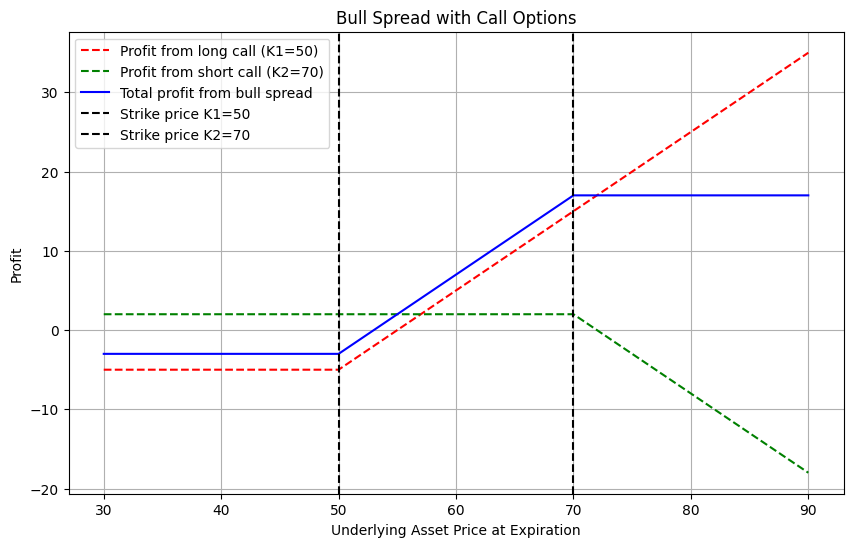

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Option parameters
K1 = 50  # strike price of the first call option (purchase)
K2 = 70  # strike price of the second call option (sale)
premium_call1 = 5  # premium paid for the first call option
premium_call2 = 2  # premium received for the second call option

# Range of underlying asset prices at expiration
S_T = np.linspace(30, 90, 400)

# Profit from the first call option (purchase)
payoff_call1 = np.maximum(S_T - K1, 0) - premium_call1

# Profit from the second call option (sale)
payoff_call2 = -np.maximum(S_T - K2, 0) + premium_call2

# Total profit from the bull spread
bull_spread_payoff = payoff_call1 + payoff_call2

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(S_T, payoff_call1, 'r--', label='Profit from long call (K1=50)')
plt.plot(S_T, payoff_call2, 'g--', label='Profit from short call (K2=70)')
plt.plot(S_T, bull_spread_payoff, 'b-', label='Total profit from bull spread')

# Marking strike prices
plt.axvline(K1, color='k', linestyle='--', label='Strike price K1=50')
plt.axvline(K2, color='k', linestyle='--', label='Strike price K2=70')

plt.title('Bull Spread with Call Options')
plt.xlabel('Underlying Asset Price at Expiration')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()


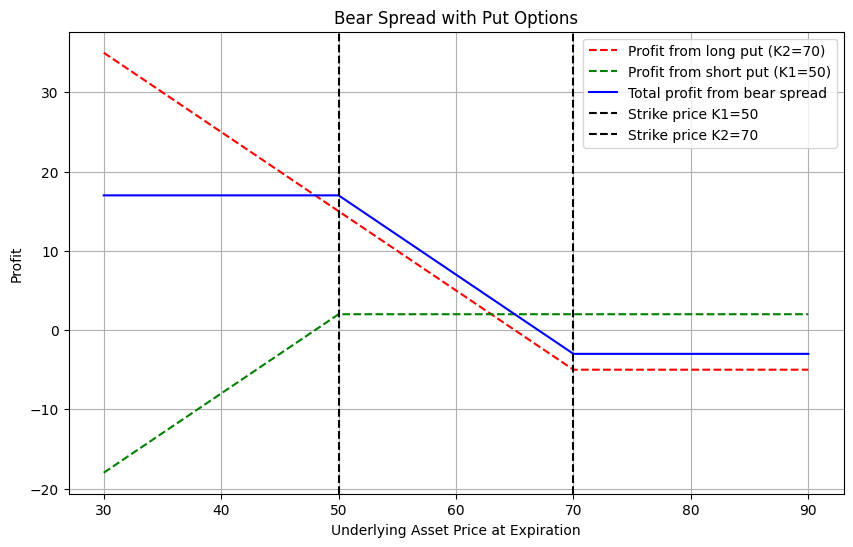

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for bear put spread (matching previous bull spread data)
K1 = 50  # short put (lower strike)
K2 = 70  # long put (higher strike)
premium_put2 = 5  # premium paid for long put (K2)
premium_put1 = 2  # premium received for short put (K1)

# Range of underlying prices at expiry
S_T = np.linspace(30, 90, 400)

# Profit from long put (K2)
payoff_long_put = np.maximum(K2 - S_T, 0) - premium_put2

# Profit from short put (K1)
payoff_short_put = -np.maximum(K1 - S_T, 0) + premium_put1

# Total profit from bear put spread
bear_spread_payoff = payoff_long_put + payoff_short_put

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_T, payoff_long_put, 'r--', label='Profit from long put (K2=70)')
plt.plot(S_T, payoff_short_put, 'g--', label='Profit from short put (K1=50)')
plt.plot(S_T, bear_spread_payoff, 'b-', label='Total profit from bear spread')

# Mark strike prices
plt.axvline(K1, color='k', linestyle='--', label='Strike price K1=50')
plt.axvline(K2, color='k', linestyle='--', label='Strike price K2=70')

plt.title('Bear Spread with Put Options')
plt.xlabel('Underlying Asset Price at Expiration')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()


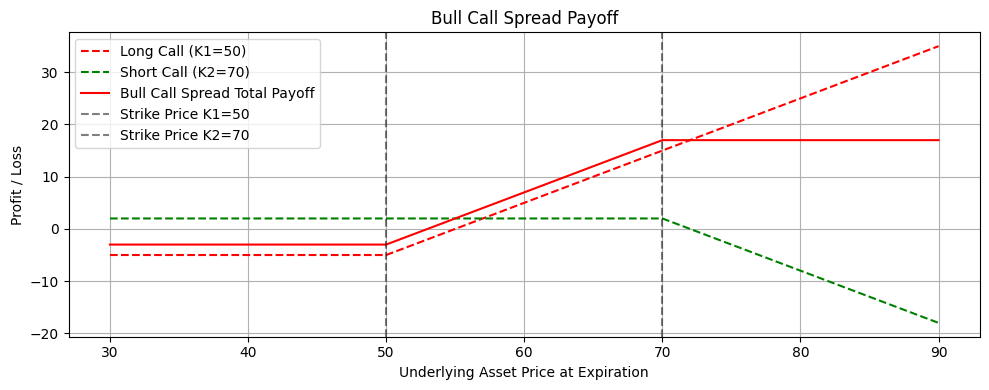

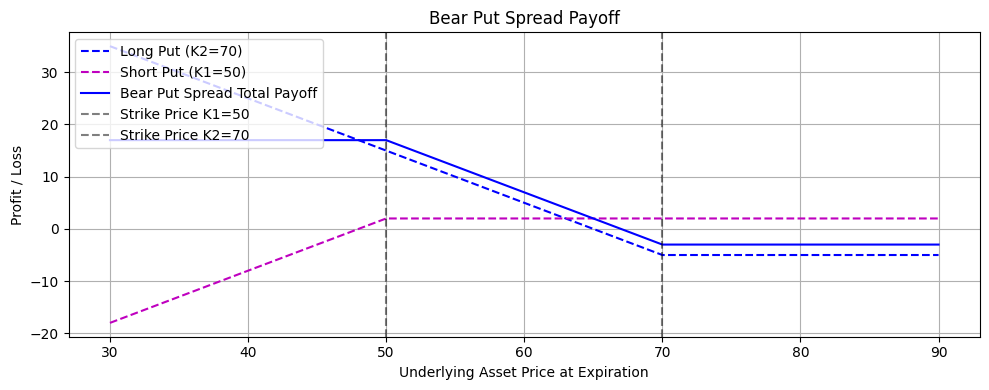

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the box spread
K1 = 50  # lower strike
K2 = 70  # higher strike
premium_call1 = 5  # premium paid for long call (strike K1)
premium_call2 = 2  # premium received for short call (strike K2)
premium_put1 = 2   # premium received for short put (strike K1)
premium_put2 = 5   # premium paid for long put (strike K2)

# Range of underlying prices at expiration
S_T = np.linspace(30, 90, 400)

# Bull call spread payoff: long call K1, short call K2
call_long_payoff = np.maximum(S_T - K1, 0) - premium_call1
call_short_payoff = -np.maximum(S_T - K2, 0) + premium_call2
bull_call_spread_payoff = call_long_payoff + call_short_payoff

# Bear put spread payoff: long put K2, short put K1
put_long_payoff = np.maximum(K2 - S_T, 0) - premium_put2
put_short_payoff = -np.maximum(K1 - S_T, 0) + premium_put1
bear_put_spread_payoff = put_long_payoff + put_short_payoff

# Plot bull call spread components
plt.figure(figsize=(10, 4))
plt.plot(S_T, call_long_payoff, 'r--', label='Long Call (K1=50)')
plt.plot(S_T, call_short_payoff, 'g--', label='Short Call (K2=70)')
plt.plot(S_T, bull_call_spread_payoff, 'r-', label='Bull Call Spread Total Payoff')
plt.axvline(K1, color='k', linestyle='--', alpha=0.5, label='Strike Price K1=50')
plt.axvline(K2, color='k', linestyle='--', alpha=0.5, label='Strike Price K2=70')
plt.title('Bull Call Spread Payoff')
plt.xlabel('Underlying Asset Price at Expiration')
plt.ylabel('Profit / Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Plot bear put spread components
plt.figure(figsize=(10, 4))
plt.plot(S_T, put_long_payoff, 'b--', label='Long Put (K2=70)')
plt.plot(S_T, put_short_payoff, 'm--', label='Short Put (K1=50)')
plt.plot(S_T, bear_put_spread_payoff, 'b-', label='Bear Put Spread Total Payoff')
plt.axvline(K1, color='k', linestyle='--', alpha=0.5, label='Strike Price K1=50')
plt.axvline(K2, color='k', linestyle='--', alpha=0.5, label='Strike Price K2=70')
plt.title('Bear Put Spread Payoff')
plt.xlabel('Underlying Asset Price at Expiration')
plt.ylabel('Profit / Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


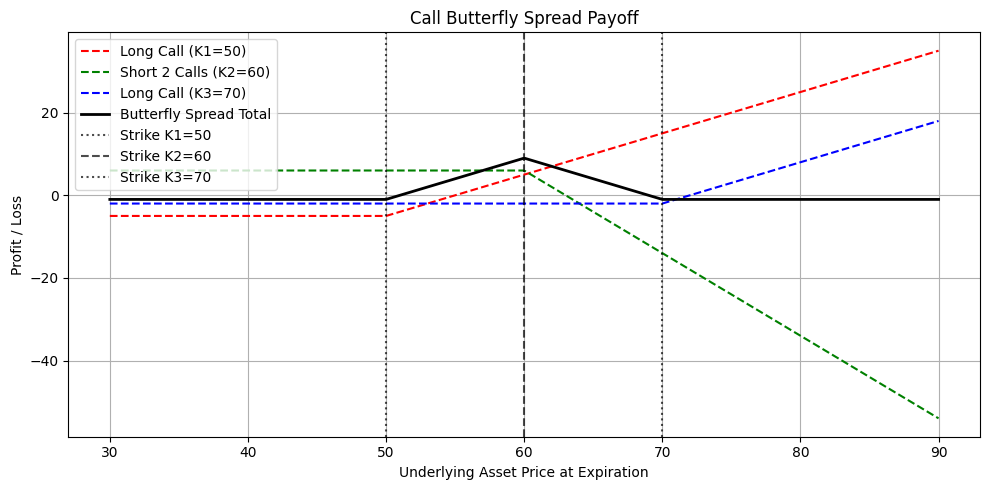

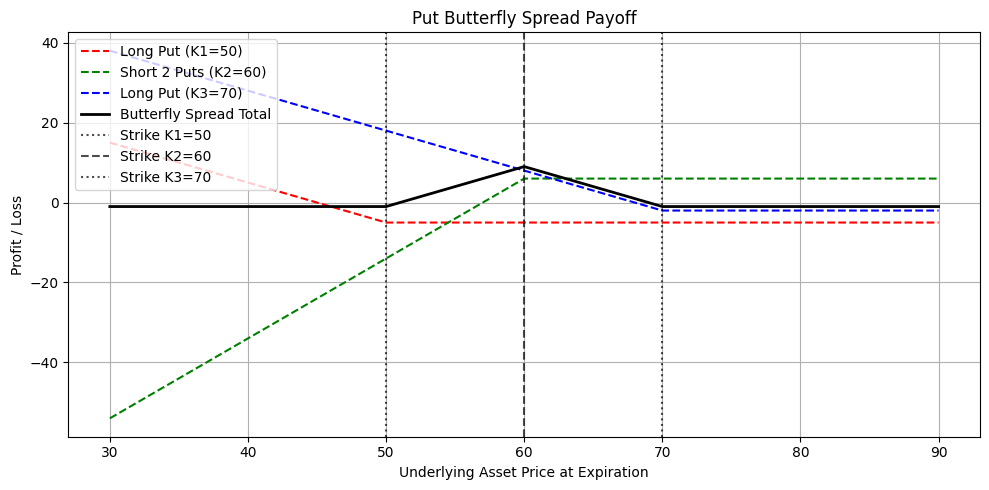

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Butterfly spread parameters
K1 = 50   # lower strike
K2 = 60   # middle strike
K3 = 70   # upper strike
premium_call1 = 5   # premium for long call at K1
premium_call2 = 3   # premium for short calls at K2
premium_call3 = 2   # premium for long call at K3
premium_put1 = 5    # premium for long put at K1
premium_put2 = 3    # premium for short puts at K2
premium_put3 = 2    # premium for long put at K3

S_T = np.linspace(30, 90, 400)

# --- Call Butterfly Spread ---
# Buy 1 call at K1
payoff_long_call1 = np.maximum(S_T - K1, 0) - premium_call1
# Sell 2 calls at K2
payoff_short_call2 = -2 * (np.maximum(S_T - K2, 0) - premium_call2)
# Buy 1 call at K3
payoff_long_call3 = np.maximum(S_T - K3, 0) - premium_call3
# Total payoff
call_butterfly_payoff = payoff_long_call1 + payoff_short_call2 + payoff_long_call3

# --- Put Butterfly Spread ---
# Buy 1 put at K1
payoff_long_put1 = np.maximum(K1 - S_T, 0) - premium_put1
# Sell 2 puts at K2
payoff_short_put2 = -2 * (np.maximum(K2 - S_T, 0) - premium_put2)
# Buy 1 put at K3
payoff_long_put3 = np.maximum(K3 - S_T, 0) - premium_put3
# Total payoff
put_butterfly_payoff = payoff_long_put1 + payoff_short_put2 + payoff_long_put3

# --- Plot: Call Butterfly Spread ---
plt.figure(figsize=(10, 5))
plt.plot(S_T, payoff_long_call1, 'r--', label='Long Call (K1=50)')
plt.plot(S_T, payoff_short_call2, 'g--', label='Short 2 Calls (K2=60)')
plt.plot(S_T, payoff_long_call3, 'b--', label='Long Call (K3=70)')
plt.plot(S_T, call_butterfly_payoff, 'k-', linewidth=2, label='Butterfly Spread Total')
plt.axvline(K1, color='k', linestyle=':', alpha=0.7, label='Strike K1=50')
plt.axvline(K2, color='k', linestyle='--', alpha=0.7, label='Strike K2=60')
plt.axvline(K3, color='k', linestyle=':', alpha=0.7, label='Strike K3=70')
plt.title('Call Butterfly Spread Payoff')
plt.xlabel('Underlying Asset Price at Expiration')
plt.ylabel('Profit / Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# --- Plot: Put Butterfly Spread ---
plt.figure(figsize=(10, 5))
plt.plot(S_T, payoff_long_put1, 'r--', label='Long Put (K1=50)')
plt.plot(S_T, payoff_short_put2, 'g--', label='Short 2 Puts (K2=60)')
plt.plot(S_T, payoff_long_put3, 'b--', label='Long Put (K3=70)')
plt.plot(S_T, put_butterfly_payoff, 'k-', linewidth=2, label='Butterfly Spread Total')
plt.axvline(K1, color='k', linestyle=':', alpha=0.7, label='Strike K1=50')
plt.axvline(K2, color='k', linestyle='--', alpha=0.7, label='Strike K2=60')
plt.axvline(K3, color='k', linestyle=':', alpha=0.7, label='Strike K3=70')
plt.title('Put Butterfly Spread Payoff')
plt.xlabel('Underlying Asset Price at Expiration')
plt.ylabel('Profit / Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


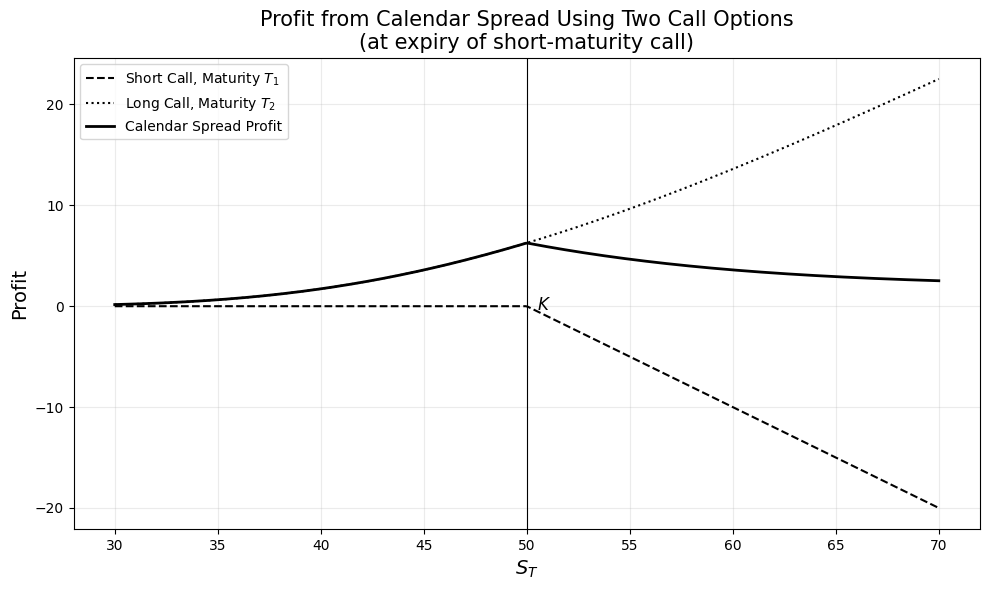

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """Black-Scholes price for a European call option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Option parameters, chosen to emphasize the calendar effect near the strike
K = 50
r = 0.05
sigma = 0.3
T1 = 0.2    # Short maturity (T1), e.g., approx. 2.5 months
T2 = 1.0    # Long maturity (T2), e.g., 12 months

S_T = np.linspace(30, 70, 400)

# Payoff from the short call expiring now:
short_call = -np.maximum(S_T - K, 0)
# Value of longer-term call at T1 (still has time-to-maturity T2-T1):
long_call = black_scholes_call(S_T, K, T2-T1, r, sigma)
# Calendar spread: net profit at short call expiry
calendar_spread = short_call + long_call

# Plot setup closely matching your image
plt.figure(figsize=(10,6))

# Short call (horizontal at profit=0 point, kinks down at K)
plt.plot(S_T, short_call, 'k--', lw=1.5, label='Short Call, Maturity $T_1$')
# Long call value at T1 (smoothed positive, grows gradually)
plt.plot(S_T, long_call, 'k:', lw=1.5, label='Long Call, Maturity $T_2$')
# Calendar spread profit (the "hump" near K, maximum at K, then decreasing)
plt.plot(S_T, calendar_spread, 'k', lw=2, label='Calendar Spread Profit')

plt.axvline(K, color='k', linestyle='-', lw=0.8)
plt.text(K+0.5, min(calendar_spread)-0.5, '$K$', fontsize=12)

plt.xlabel('$S_T$', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Profit from Calendar Spread Using Two Call Options\n(at expiry of short-maturity call)', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


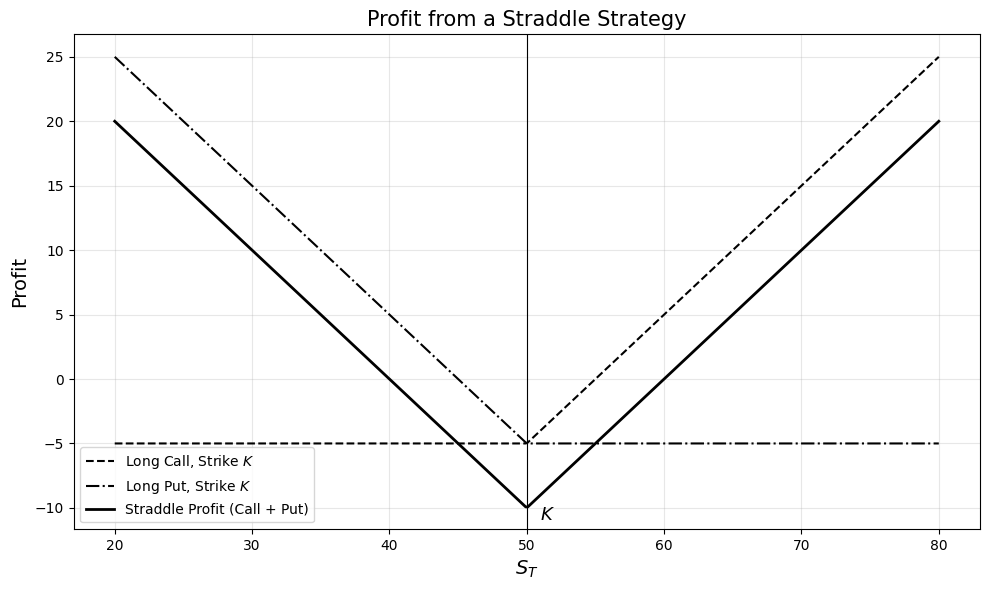

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 50              # strike price
premium_call = 5    # premium paid for the call
premium_put = 5     # premium paid for the put (example: both at 5, can be adjusted)

S_T = np.linspace(20, 80, 400)  # Underlying price at expiration

# Long call payoff
call_payoff = np.maximum(S_T - K, 0) - premium_call
# Long put payoff
put_payoff = np.maximum(K - S_T, 0) - premium_put
# Straddle payoff
straddle_payoff = call_payoff + put_payoff

# Plot setup
plt.figure(figsize=(10, 6))
plt.plot(S_T, call_payoff, 'k--', label='Long Call, Strike $K$')
plt.plot(S_T, put_payoff, 'k-.', label='Long Put, Strike $K$')
plt.plot(S_T, straddle_payoff, 'k-', linewidth=2, label='Straddle Profit (Call + Put)')

plt.axvline(K, color='k', linestyle='-', lw=0.8)
plt.text(K+1, min(straddle_payoff)-1, '$K$', fontsize=13)
plt.xlabel('$S_T$', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Profit from a Straddle Strategy', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

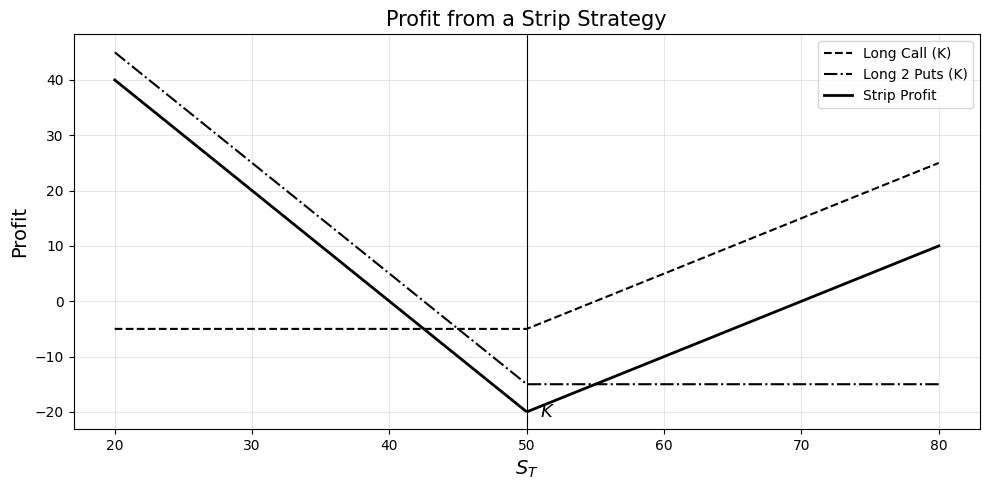

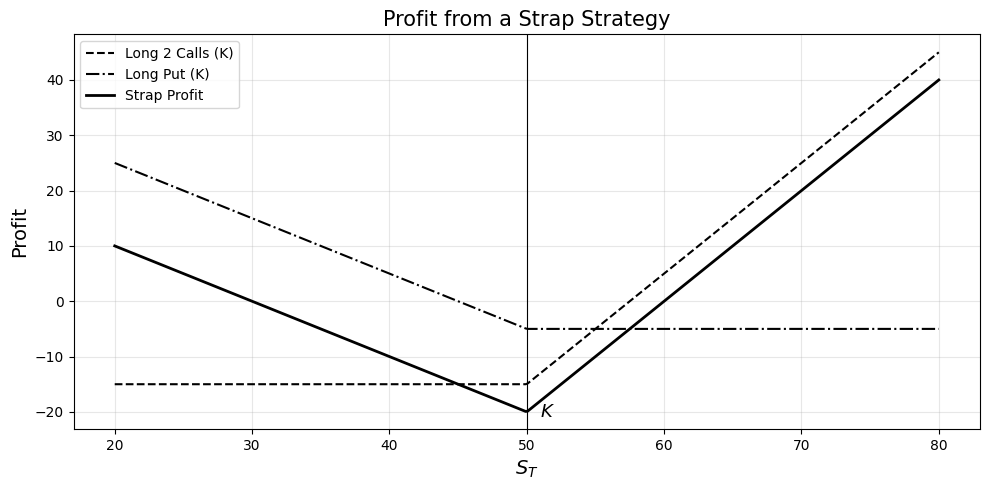

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 50
premium_call = 5
premium_put = 5
S_T = np.linspace(20, 80, 400)

# --- Strip: Long 1 call + Long 2 puts, all at K ---
call_profit = np.maximum(S_T - K, 0) - premium_call
put_profit = np.maximum(K - S_T, 0) - premium_put

strip_profit = call_profit + 2 * put_profit - premium_put  # Two puts (thus 2 premiums for long puts)

plt.figure(figsize=(10, 5))
plt.plot(S_T, call_profit, 'k--', label='Long Call (K)')
plt.plot(S_T, 2 * put_profit - premium_put, 'k-.', label='Long 2 Puts (K)')
plt.plot(S_T, strip_profit, 'k-', linewidth=2, label='Strip Profit')
plt.axvline(K, color='k', linestyle='-', lw=0.8)
plt.text(K+1, min(strip_profit)-1, '$K$', fontsize=13)
plt.xlabel('$S_T$', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Profit from a Strip Strategy', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Strap: Long 2 calls + Long 1 put, all at K ---
strap_profit = 2 * call_profit - premium_call + put_profit

plt.figure(figsize=(10, 5))
plt.plot(S_T, 2 * call_profit - premium_call, 'k--', label='Long 2 Calls (K)')
plt.plot(S_T, put_profit, 'k-.', label='Long Put (K)')
plt.plot(S_T, strap_profit, 'k-', linewidth=2, label='Strap Profit')
plt.axvline(K, color='k', linestyle='-', lw=0.8)
plt.text(K+1, min(strap_profit)-1, '$K$', fontsize=13)
plt.xlabel('$S_T$', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.title('Profit from a Strap Strategy', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
